In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import seaborn as sns
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import cross_val_score

In [2]:
X_train = pd.read_csv("../../data/kaggle-competitions/reviews/amazon_review_ID.shuf.lrn.csv", index_col="ID")
y_train = pd.read_csv("../../data/kaggle-competitions/reviews/amazon_review_ID.shuf.sol.ex.csv", index_col="ID")
X_valid = pd.read_csv("../../data/kaggle-competitions/reviews/amazon_review_ID.shuf.tes.csv", index_col="ID")

### Metrics function

In [3]:
def calculate_performance_metrics(y_test, y_pred, class_names=None):        
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    return pd.Series({
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
    
def calculate_per_class_accuracy(y_test, y_pred, class_names=None):
    if class_names is None:
        class_names = y_test.unique()
        
    present_classes = list(filter(lambda name: y_test.str.contains(name).any(), class_names))
    
    cm = confusion_matrix(y_test, y_pred)
    accuracies = np.divide(cm.diagonal(), cm.sum(axis=1))
    
    return pd.Series(accuracies[~np.isnan(accuracies)], index=present_classes)

In [4]:
pd.DataFrame({
    "Column Name": X_train.columns,
    "Min value": X_train.min(),
    "Max value": X_train.max()
})

,Column Name,Min value,Max value
V1,V1,0,32
V2,V2,0,21
V3,V3,0,20
V4,V4,0,25
V5,V5,0,24
...,...,...,...
V9997,V9997,0,3
V9998,V9998,0,3
V9999,V9999,0,3
V10000,V10000,0,4


In [5]:
y_train

,Class
ID,
750,Wilson
751,Wilson
752,Wilson
753,Wilson
754,Wilson
...,...
1495,Wilson
1496,Wilson
1497,Wilson


In [6]:
seed = 1183766
test_size = 0.2
shuffle_train_test = True

In [7]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
ID,,,,,,,,,,,,,,,,,,,,,
0,14,9,8,12,7,4,5,3,2,2,...,0,1,0,1,0,1,1,0,0,Grove
1,12,3,8,6,5,3,2,3,2,0,...,0,0,0,0,0,0,0,0,0,Chell
2,17,5,7,12,8,3,0,3,2,3,...,0,1,0,0,0,0,1,0,0,Auken
3,9,6,10,6,4,7,7,3,3,3,...,0,0,0,0,2,0,0,0,0,Davisson
4,8,4,5,5,1,7,0,0,0,0,...,0,0,3,0,0,0,0,0,0,Vision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,9,4,3,4,6,7,2,1,0,1,...,1,1,1,2,0,0,0,0,0,Engineer
746,13,6,1,13,2,5,7,5,3,1,...,0,0,0,1,0,0,0,1,0,Morrison
747,19,9,12,3,9,7,5,2,5,2,...,1,0,0,0,0,0,0,1,0,CFH


In [8]:
y = X_train["Class"]
X = X_train.drop("Class", axis=1)

In [9]:
y.unique()
y.count()

750

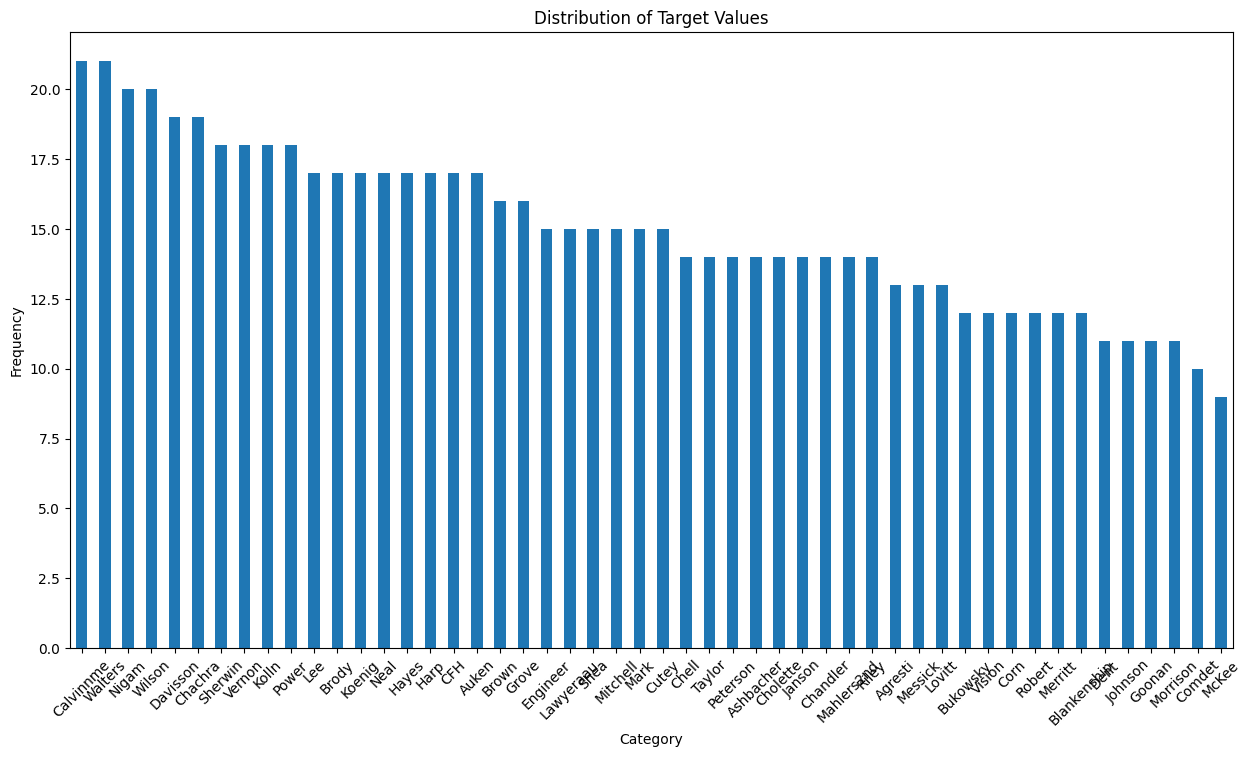

In [10]:
category_counts = y.value_counts()

# Create a bar plot
plt.figure(figsize=(15, 8))  # Adjust the size as needed
category_counts.plot(kind='bar')
plt.title('Distribution of Target Values')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the category names for better readability
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, shuffle=shuffle_train_test)

In [12]:
pd.DataFrame({
    "Column Name": X_train.columns,
    "Min value": X_train.min(),
    "Max value": X_train.max()
})

,Column Name,Min value,Max value
V1,V1,0,32
V2,V2,0,21
V3,V3,0,17
V4,V4,0,25
V5,V5,0,24
...,...,...,...
V9996,V9996,0,4
V9997,V9997,0,3
V9998,V9998,0,3
V9999,V9999,0,3


In [13]:
pd.DataFrame({
    "Column Name": X_test.columns,
    "Min value": X_test.min(),
    "Max value": X_test.max()
})

,Column Name,Min value,Max value
V1,V1,0,28
V2,V2,0,18
V3,V3,0,20
V4,V4,0,19
V5,V5,1,18
...,...,...,...
V9996,V9996,0,3
V9997,V9997,0,3
V9998,V9998,0,3
V9999,V9999,0,2


In [14]:
#Check for missing values
missing_values = X_train.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

V1        0
V2        0
V3        0
V4        0
V5        0
         ..
V9996     0
V9997     0
V9998     0
V9999     0
V10000    0
Length: 10000, dtype: int64


In [15]:
data_types = X_train.dtypes
print(data_types)

V1        int64
V2        int64
V3        int64
V4        int64
V5        int64
          ...  
V9996     int64
V9997     int64
V9998     int64
V9999     int64
V10000    int64
Length: 10000, dtype: object


In [16]:
scaler = StandardScaler()
scale_features = []
category_encoder = OneHotEncoder()
category_features = []

In [17]:
print(y)

ID
0         Grove
1         Chell
2         Auken
3      Davisson
4        Vision
         ...   
745    Engineer
746    Morrison
747         CFH
748       Brown
749       Hayes
Name: Class, Length: 750, dtype: object


### Neural Network Classification (Multi-layer Perceptron)

In [18]:
mlp_classifier = MLPClassifier(random_state=seed)
mlp_classifier.fit(X_train, y_train)

# Predictions
mlp_predictions = mlp_classifier.predict(X_test)

In [ ]:
mlp_classifier = MLPClassifier(random_state=seed)

# Perform cross-validation
scores = cross_val_score(mlp_classifier, X_train, y_train, cv=5) 

# Print the accuracy for each fold
print("Accuracy for each fold:", scores)

# Print the mean accuracy and standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())


### Printing predictions

In [20]:
calculate_performance_metrics(y_test, mlp_predictions)

/home/tobsel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy     0.436170
Precision    0.447453
Recall       0.436170
F1 Score     0.404578
dtype: float64

### Stochastic Gradient Descent (SGD) Classification

In [22]:
sgd_classifier = SGDClassifier(random_state=seed)
sgd_classifier.fit(X_train, y_train)

# Predictions
sgd_predictions = sgd_classifier.predict(X_test)

In [23]:
scores_sgd = cross_val_score(sgd_classifier, X_train, y_train, cv=5) 

print("Accuracy for each fold:", scores_sgd)
print("Mean accuracy:", scores_sgd.mean())
print("Standard deviation:", scores_sgd.std())

/home/tobsel/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy for each fold: [0.40707965 0.33628319 0.375      0.44642857 0.15178571]
Mean accuracy: 0.34331542351453853
Standard deviation: 0.10240624162151062


In [25]:
import csv

# Assuming you have an array or list of IDs like this:
ids = X_valid.index.values  # Replace with your list/array of IDs
# Combine the IDs with the corresponding predictions
predictions = list(zip(ids, sgd_classifier.predict(X_valid)))
# Specify the filename for your CSV
filename = '../../doc/submissions/kaggle-competitions/reviews/stochastic_gradient_descent.csv'

# Writing to csv file
with open(filename, 'w', newline='') as csvfile:
    # Create a csv writer object
    csvwriter = csv.writer(csvfile)

    # Write the headers (adjust as per Kaggle's requirement)
    csvwriter.writerow(['ID', 'Class'])

    # Write the data rows
    csvwriter.writerows(predictions)

print(f'Submission saved to {filename}')

Submission saved to ../../doc/submissions/kaggle-competitions/reviews/stochastic_gradient_descent.csv


### Printing predictions

In [ ]:
calculate_performance_metrics(y_test, sgd_predictions)


### Nearest Centroid Classifier

In [ ]:
# Define the Nearest Centroid classifier
nc_classifier = NearestCentroid()

# Fit the classifier to the training data
nc_classifier.fit(X_train, y_train)

# Make predictions on the test data
nc_predictions = nc_classifier.predict(X_test)


### Printing predictions

In [ ]:
calculate_performance_metrics(y_test, nc_predictions)


In [ ]:
scores_nc = cross_val_score(nc_classifier, X_train, y_train, cv=5) 

print("Accuracy for each fold:", scores_nc)
print("Mean accuracy:", scores_nc.mean())
print("Standard deviation:", scores_nc.std())

### Plots


In [ ]:
# Assuming mlp_predictions, sgd_predictions, gboost_predictions are your model predictions
conf_matrix_mlp = confusion_matrix(y_test, mlp_predictions)
conf_matrix_sgd = confusion_matrix(y_test, sgd_predictions)
conf_matrix_nc = confusion_matrix(y_test, nc_predictions)


In [ ]:
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap=cmap)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(title)


In [ ]:
plot_confusion_matrix(conf_matrix_mlp, title='Confusion Matrix for MLP Classifier')
plot_confusion_matrix(conf_matrix_sgd, title='Confusion Matrix for SGD Classifier')
plot_confusion_matrix(conf_matrix_nc, title='Confusion Matrix for Gradient Boosting Classifier')
